In [7]:
%matplotlib inline

In [130]:
from IPython.display import Image,SVG

In [5]:
import numpy as np
import matplotlib.pyplot as plt

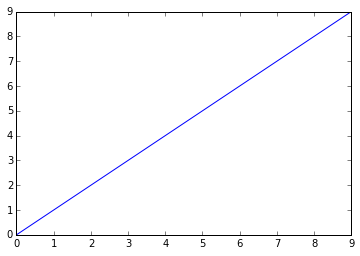

In [6]:
plt.plot(np.arange(10))

In [7]:
fig = plt.figure()

In [9]:
from pandas import Series, DataFrame
import pandas as pd

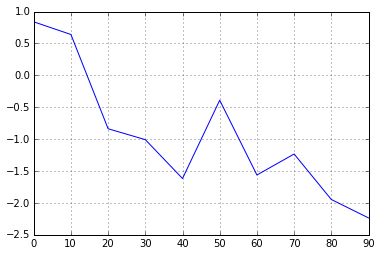

In [10]:
s = Series(np.random.randn(10).cumsum(),
          index=np.arange(0,100,10))
s.plot()

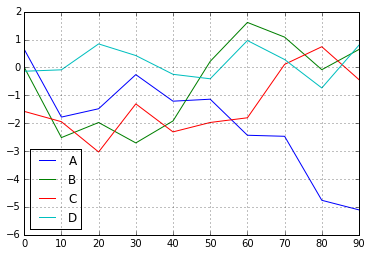

In [11]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A', 'B', 'C', 'D'],
              index=np.arange(0,100, 10))
df.plot()

# 시각화 예시

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
# 서울

In [108]:
df_senior_seoul = pd.read_csv('seoul/senior_lsf.csv')
df_senior_seoul

,COUNTY,NUMBER
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


각 행정구역별 색상 정보 설정

In [109]:
def set_color(group):
    number = group.NUMBER
    
    # 그룹의 색상 설정
    from random import randint
    group['color'] = (lambda: '#{:X}{:X}{:X}'.format(
        randint(0,255), randint(0,255), randint(0,255)))()
    return group

# NUMBER 열의 값에 따라 색상 설정
df_senior_seoul = df_senior_seoul.groupby('NUMBER').apply(set_color)
df_senior_seoul

,COUNTY,NUMBER,color
0,Jongno-gu,61,#1CEB56
1,Jung-gu,53,#D4BBAE
2,Yongsan-gu,110,#827C23
3,Seongdong-gu,155,#C17487
4,Gwangjin-gu,103,#946584
5,Dongdaemun-gu,146,#16EA18
6,Jungnang-gu,128,#17F4AD
7,Seongbuk-gu,158,#729693
8,Gangbuk-gu,111,#46F077
9,Dobong-gu,139,#EBB7D3


In [122]:
# 서울시 지도 정보
# http://upload.wikimedia.org/wikipedia/commons/a/ae/Seoul_districts.svg
svg_seoul_districts = open('seoul/seoul_districts.svg')
from bs4 import BeautifulSoup
soup = BeautifulSoup(svg_seoul_districts)
districts = soup.findAll('path')

In [156]:
# 행정구별 색상 정보 설정
for d in districts:
    county = df[df.COUNTY == d['id']]
    if county.empty: continue
    color = county.color.values[0]
    d['fill'] = color
    
# 결과 이미지 저장
result_svg_filepath = 'seoul/senior_stats.svg'
with open(result_svg_filepath, 'w') as svg:
    svg.write(soup.prettify())

# Pandas 그래프 그리기

In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [4]:
s=Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [5]:
s

0    -1.701002
10   -0.953421
20   -1.287695
30   -1.499800
40   -0.565798
50    0.151571
60   -0.826278
70   -1.230186
80   -2.723145
90   -2.879823
dtype: float64

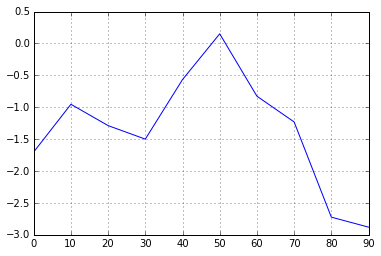

In [8]:
s.plot()

In [9]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A','B','C','D'],
              index=np.arange(0,100,10))

In [10]:
df

,A,B,C,D
0,-1.802467,0.983304,0.442787,1.076001
10,-4.129176,-0.332972,-0.973459,0.210315
20,-4.285702,-2.645474,-2.469504,0.123465
30,-3.433005,-1.592166,-3.746017,1.298897
40,-3.094413,0.729417,-3.705078,0.444415
50,-1.725454,1.817758,-5.017380,-0.145698
60,-1.730184,1.232129,-3.898988,-0.864911
70,-2.078819,2.125648,-3.618870,-1.337347
80,-2.273359,1.551377,-4.272731,-3.990946
90,-1.177762,1.014886,-5.303463,-3.160828


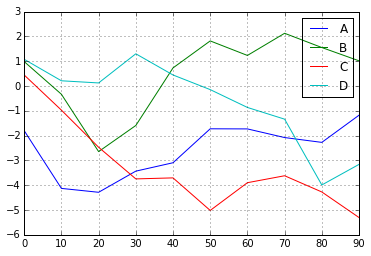

In [16]:
df.plot()

In [18]:
tips = pd.read_csv('../pydata/ch08/tips.csv')

In [19]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [28]:
party_counts = pd.crosstab(tips.day, tips['size'])

In [29]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [24]:
tips.size

1708

In [27]:
type(tips.day)

pandas.core.series.Series

In [30]:
party_counts = party_counts.ix[:, 2:5]

In [31]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [32]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

In [33]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


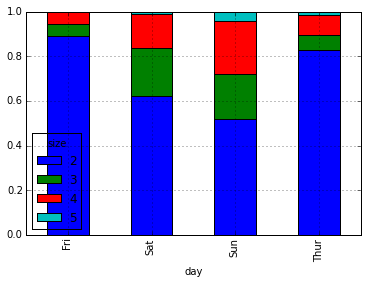

In [36]:
party_pcts.plot(kind='bar', stacked=True)

In [37]:
# 전체 결제금액 대비 팁의 비율
tips['tip_pic'] = tips['tip']/tips['total_bill']

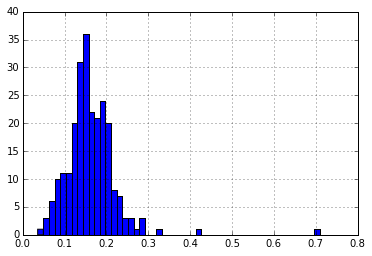

In [46]:
tips['tip_pic'].hist(bins=50)

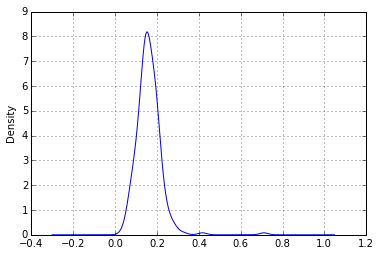

In [48]:
tips['tip_pic'].plot(kind='kde')